# Práctica 6. Clustering de datos con K-Means

El clustering de datos con K-Means es un algoritmo no supervisado de apredizaje automático que nos permite encontrar 'K' grupos o clusters entre los datos. Los datos se agruparan conforme a sus características.

Los datos que se usan para este algoritmo son numéricos o continuos; es recomendable que los datos usados estén normalizados.

In [1]:
# importamos las librerías para realizar la práticas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# importamos el archivo .cvs que utilizaremos
df = pd.read_csv('CC GENERAL.csv')
df.dropna()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Agruparemos de acuerdo a la Tenencia del servicio de tarjeta de crédito para el usuario.

In [3]:
# podemos hacer un conteo de cuantos clientes hay por cada porcentaje de actualización
print(df.groupby('TENURE').size())

TENURE
6      204
7      190
8      196
9      175
10     236
11     365
12    7584
dtype: int64


### Visualización de datos

Para poder ver la frecuencia de las demás columnas, realizaremos un histograma de cada una de ellas.

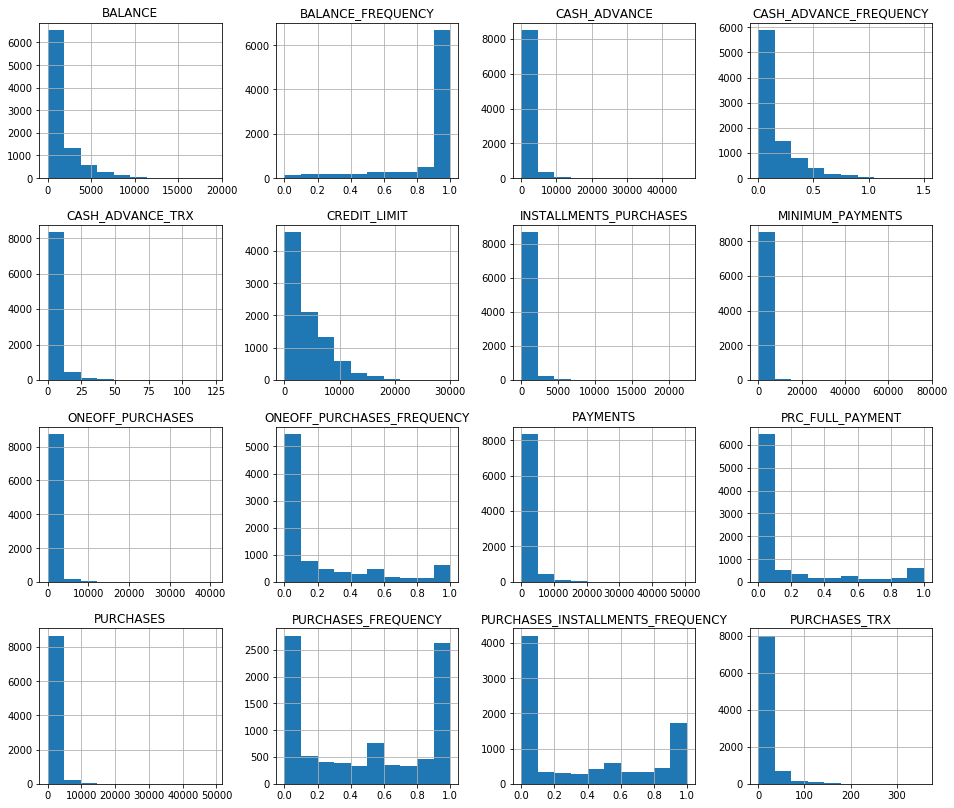

In [4]:
df.drop(['TENURE'],1).hist(figsize=(16,14))
plt.show()

### Número óptimo de clusters

Ahora haremos una gráfica para determinar el número óptimo 'k' de clusters para nuestros datos.

In [5]:
# usaremos las siguientes variables para poder realizar la seleccion de clusters
x = np.array(df[["BALANCE_FREQUENCY","PURCHASES"]])
y = np.array(df['TENURE'])
X = np.array(list(zip(x,y)))

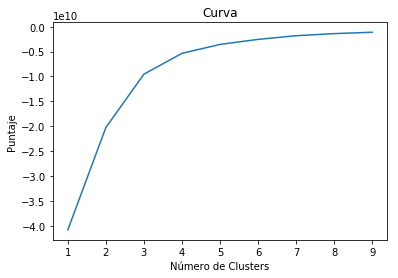

In [7]:
# graficamos para determinar k
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva')
plt.show()

La curva comienza a tener más estabilidad a partir del valor k = 4, por lo que usaremos ese valor.

### K-Means

In [8]:
# kmeans
kmeans = KMeans(n_clusters=4).fit(x)
labels = kmeans.predict(x)
# los centroides son el 'centro' de cada cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[8.59201126e-01 3.77648597e+02]
 [9.74793409e-01 2.86012077e+04]
 [9.80357157e-01 8.37835538e+03]
 [9.57973001e-01 2.81314460e+03]]


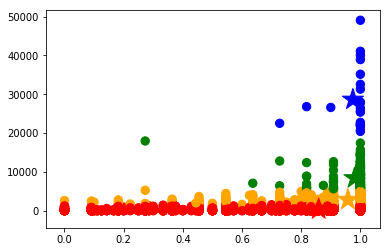

In [9]:
colores=['red','blue','green','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])

f1 = df['BALANCE_FREQUENCY'].values
f2 = df['PURCHASES'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=500)
plt.show()

#### Conclusión

Notamos que los usuarios con más compras son los que mayor fecuencia tienen en actualizar su saldo (grupo verde), mientras que los que menos compran están dispersos en toda la frecuencia, desde 0 hasta 1 como máxima frecuencia al actualizar sus saldos.
El grupo rojo tiene similitud con el naranja y el azul ya está más separado, teniendo la mayoría de sus clientes en una frecuencia mayor a 0.5.